# Tutorial on `OpenStreetMap`
Credits to Myriam Prasow-Émond, PhD candidate in Earth Science & Engineering, Imperial College London (m.prasow-emond22@imperial.ac.uk)

In [12]:
pip install --upgrade osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 6.9 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 20.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade earthengine-api

SyntaxError: invalid syntax (164658506.py, line 1)

In [16]:
pip install --upgrade geemap

  Using cached colour-0.1.5-py2.py3-none-any.whl.metadata (18 kB)
  Using cached geocoder-1.38.1-py2.py3-none-any.whl.metadata (14 kB)
  Using cached ipyevents-2.0.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached ipyfilechooser-0.6.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached ipyleaflet-0.19.2-py3-none-any.whl.metadata (5.3 kB)
  Using cached ipytree-0.2.2-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached pyperclip-1.9.0-py3-none-any.whl
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached python_box-7.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jupyter_leaflet-0.19.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached traittypes-0.2.1-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached ratelim-0.1.6-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
pip install --upgrade rasterio

  Using cached rasterio-1.4.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached rasterio-1.4.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (22.3 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


## Import modules

In [22]:
from io import StringIO
import ee # this is the 'earthengine-api' package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox # OpenStreetMap API package
import shapely # for geometry operations
import geopandas as gpd
import pandas as pd
import geemap
import requests
import os
import zipfile
import xarray as xr
import rasterio
%matplotlib inline 
# or qt for interactive plots

# for LaTeX-like fonts :)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Define the area of interest
* There are various methods to query OSM data for a specific location, such as using coordinates (longitude, latitude), a polygon, or a bounding box.
* You can also input the name of a place, such as Pakistan!

In [24]:
# make sure to add as much information so that it queries the right location :)
roi = 'Pakistan'
# Extent of Pakistan
gdf_Pakistan = ox.geocode_to_gdf(roi)

## Define Provinces

In [27]:
provinces = ['Khyber Pakhtunkhwa, Pakistan', 'Punjab, Pakistan', 'Sindh, Pakistan', 'Balochistan, Pakistan', 'Gilgit-Baltistan, Pakistan','Kaschmir, Pakistan']

gdfs = []
for province in provinces:
    gdf = ox.geocode_to_gdf(province)
    gdfs.append(gdf)

gdf_Pakistan = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

## Enter Values for whatever variable you want to display
- In the order of provinces

In [29]:
participants = gpd.GeoDataFrame(np.array([0.431,0.432,0.0885,0.0411,0.000719,0.00511]))
gdf_Pakistan['Participants'] = participants

## Plot

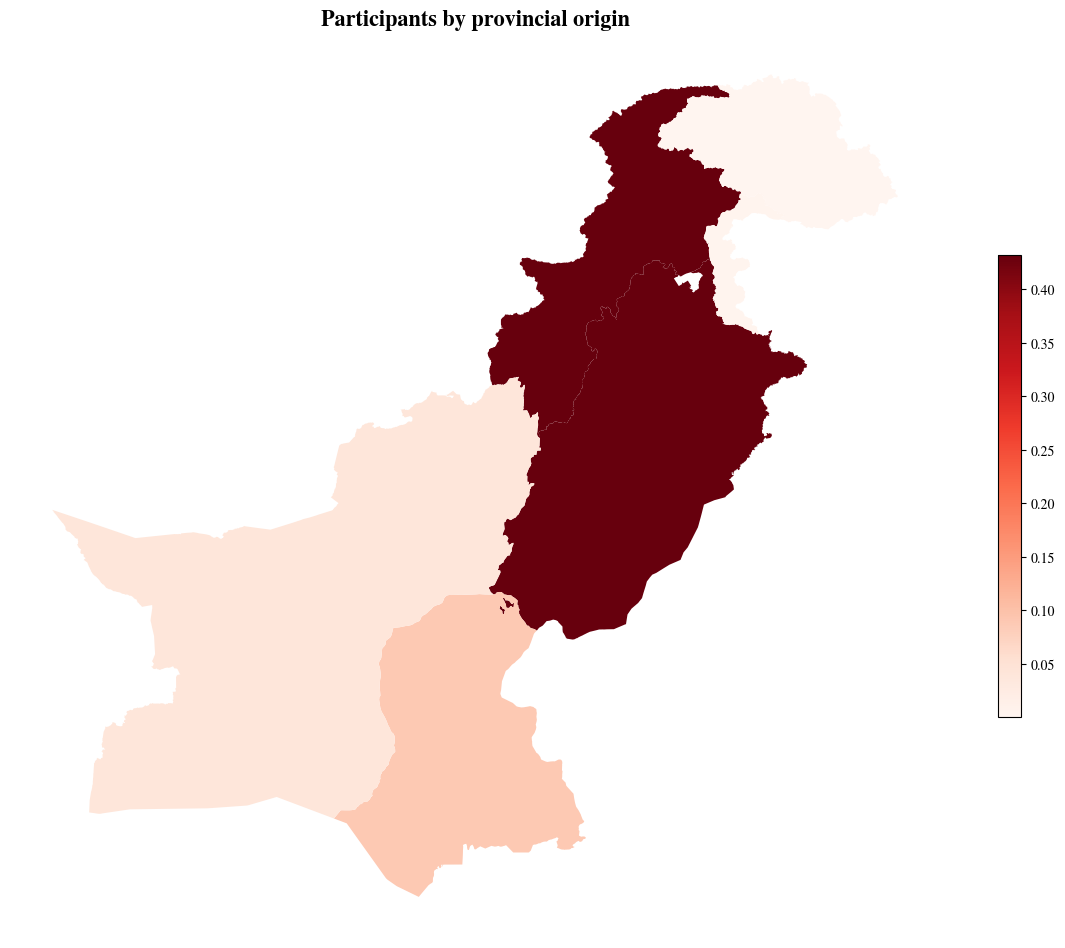

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))

# plot the data
gdf_Pakistan.plot(ax=ax, column='Participants', legend=True, cmap='Reds', legend_kwds={
        'shrink': 0.4,         # Shrink the size of the colorbar
        'aspect': 20,          # Adjust the aspect ratio
        'orientation': 'vertical',  # Orientation of the colorbar
    }
)

# Add title and province labels
ax.set_title("Participants by provincial origin", fontsize=16, fontweight='bold')

# Aesthetics
ax.axis('off')

# Save the plot to a file
output_path = "participants_by_province.png"  # Specify your desired file path and name
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Adjust dpi for resolution and bbox for padding

# Show the plot
plt.show()